In [17]:
import pandas as pd, geopandas as gpd, matplotlib.pyplot as plt, contextily as cx

# analyses

In [2]:
data_osm2 = pd.read_csv('data/fig5/contacts_matchdays_osmmapped.csv', low_memory=False)
data_osmpoint2 = pd.read_csv('data/fig5/contacts_matchdays_osmpointmapped2.csv', low_memory=False)

In [3]:
data_osm2 = data_osm2[data_osm2.city.isin(['Stuttgart','Frankfurt am Main','Dortmund','München'])]
data_osmpoint2 = data_osmpoint2[data_osmpoint2.city.isin(['Stuttgart','Frankfurt am Main','Dortmund','München'])]

In [4]:
data_osm2_bef = data_osm2[(data_osm2.hour_rel.isin([-2,-1]))].copy() # [(data_osm2.hour_rel < 0)].copy() [(data_osm2.hour_rel.isin([-2,-1]))].copy()
data_osm2_bef['match_rel'] = 'before match'
data_osm2_dur = data_osm2[(data_osm2.hour_rel.isin([0,1]))].copy()
data_osm2_dur['match_rel'] = 'during match'
data_osm2_aft = data_osm2[(data_osm2.hour_rel.isin([2,3]))].copy() # [(data_osm2.hour_rel > 1)].copy() [(data_osm2.hour_rel.isin([2,3]))].copy()
data_osm2_aft['match_rel'] = 'after match'
data_osm2_all = data_osm2.copy()
data_osm2_all['match_rel'] = 'day of the match'
data_osm2 = pd.concat([data_osm2_bef, data_osm2_dur, data_osm2_aft])#, data_osm2_all])

data_osmpoint2_bef = data_osmpoint2[(data_osmpoint2.hour_rel.isin([-2,-1]))].copy() # [(data_osmpoint2.hour_rel < 0)].copy() [(data_osmpoint2.hour_rel.isin([-2,-1]))].copy()
data_osmpoint2_bef['match_rel'] = 'before match'
data_osmpoint2_dur = data_osmpoint2[(data_osmpoint2.hour_rel.isin([0,1]))].copy()
data_osmpoint2_dur['match_rel'] = 'during match'
data_osmpoint2_aft = data_osmpoint2[(data_osmpoint2.hour_rel.isin([2,3]))].copy() # [(data_osmpoint2.hour_rel > 1)].copy() [(data_osmpoint2.hour_rel.isin([2,3]))].copy()
data_osmpoint2_aft['match_rel'] = 'after match'
data_osmpoint2_all = data_osmpoint2.copy()
data_osmpoint2_all['match_rel'] = 'day of the match'
data_osmpoint2 = pd.concat([data_osmpoint2_bef, data_osmpoint2_dur, data_osmpoint2_aft])#, data_osmpoint2_all])

In [5]:
set(data_osm2[(data_osm2.route=='light_rail') & (data_osm2.match_rel=='before match') & (data_osm2.city=='Stuttgart')].tl)

{579593100010,
 597401220230,
 601852230010,
 601852230320,
 601852232100,
 601853223100,
 606290320100,
 606290320200,
 610731110200,
 610731231130,
 619560330200}

In [6]:
set(data_osm2[(data_osm2.amenity=='parking') & (data_osm2.match_rel=='before match') & (data_osm2.city=='Stuttgart')].tl)

{592971020130,
 610751303310,
 610751303330,
 610751312030,
 610751312200,
 610751312220,
 610751312300}

In [7]:
set(data_osm2[(data_osm2.barrier=='fence') & (data_osm2.match_rel=='before match') & (data_osm2.city=='Stuttgart')].tl)

{606302322320,
 610731231130,
 610750030110,
 610750030300,
 610751330230,
 610751332010,
 610760213200,
 615171210030}

In [8]:
set(data_osm2[(data_osm2.leisure=='stadium') & (data_osm2.match_rel=='before match') & (data_osm2.city=='Stuttgart')].tl)

{610751313130,
 610751313220,
 610751313310,
 610751313320,
 610751330300,
 610751330310,
 610751330320,
 610751331000,
 610751331010,
 610751331210,
 610751331310,
 610751331320,
 610751331330,
 610751333110,
 610760200330,
 610760201230,
 610760201320,
 610760202020,
 610760202030,
 610760202110,
 610760202200,
 610760203000,
 610760222020,
 610760222130,
 610760222200,
 610760222210,
 610760222220,
 610760222230,
 610760222320,
 610760223020,
 610760223030,
 610760223200,
 610760230100}

In [9]:
set(data_osmpoint2[(data_osmpoint2.amenity_point=='fast_food') & (data_osmpoint2.match_rel=='during match') & (data_osmpoint2.city=='Stuttgart')].tl)

{601852203230, 601852203320, 601852221130, 601852232010}

- `route='light_rail'`: 579593100010 (far from stadium)
- `amenity='parking'`: 610751303310 (near stadium)
- `leisure='stadium'`: 6107513132(20) (inside stadium)
- `amenity='fast_food'`: 601852203230 (city center)

In [12]:
tile_c = 601852203230
gdf = gpd.read_file(f'data/fig5/contact_osm_map_osmid_{tile_c}.gpkg')
gdf

C:\Users\steven.schulz\AppData\Local\anaconda3\envs\skmob2\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


osm_id   color                                           geometry
0     9414673    blue  POLYGON ((1021669.214 6237411.152, 1021671.897...
1    26005571    blue  POLYGON ((1020826.236 6236514.046, 1020827.828...
2   125911904    blue  POLYGON ((1021557.816 6237449.533, 1021567.824...
3   359863888    blue  LINESTRING (1021559.096 6237461.325, 1021569.5...
4   461693847    blue  POLYGON ((1021579.568 6237461.342, 1021632.512...
5     9414673  orange                    POINT (1021751.579 6237454.112)
6     9414673  orange                    POINT (1021722.146 6237488.742)
7     9414673  orange                    POINT (1021760.963 6237469.298)
8     9414673  orange                    POINT (1021698.457 6237449.415)
9     9414673  orange                    POINT (1021781.836 6237504.774)
10    9414673  orange                      POINT (1021780.6 6237500.956)
11    9414673  orange                    POINT (1021691.878 6237437.269)
12    9414673  orange                    POINT (1021776.637 6237495.196)
13    9414673  orange                    POINT (1021717.259 6237479.485)
14    9414673  orange                     POINT (1021789.06 6237515.045)
15    9414673  orange                    POINT (1021722.146 6237488.742)
16    9414673  orange                    POINT (1021751.579 6237454.112)
17    9414673  orange                    POINT (1021709.934 6237443.942)
18    9414673  orange                    POINT (1021716.146 6237395.864)
19    9414673  orange                     POINT (1021742.25 6237438.722)
20    9414673  orange                     POINT (1021742.25 6237438.722)
21    9414673  orange                    POINT (1021728.235 6237496.969)
22    9414673  orange                     POINT (1021789.06 6237515.045)
23    9414673  orange                    POINT (1021782.426 6237504.233)
24    9414673  orange                    POINT (1021709.422 6237384.428)
25    9414673  orange                    POINT (1021782.426 6237504.233)
26    9414673  orange                    POINT (1021728.235 6237496.969)
27  125911904  orange                    POINT (1021607.598 6237419.988)
28  125911904  orange                    POINT (1021579.813 6237439.583)
29  125911904  orange                    POINT (1021607.598 6237419.988)
30    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
31   26005571     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
32  125911904     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
33  359863888     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
34  461693847     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
35    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
36    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
37    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
38    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
39    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
40    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
41    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
42    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
43    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
44    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
45    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
46    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
47    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
48    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
49    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
50    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
51    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
52    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 10216...
53    9414673     red  MULTIPOLYGON (((1021692.029 6237377.337, 1

In [13]:
gdf_sam = gdf.iloc[:len(gdf)//2+1].copy()
gdf_sam.explore(color=gdf_sam.color, marker_kwds={"radius": 10})

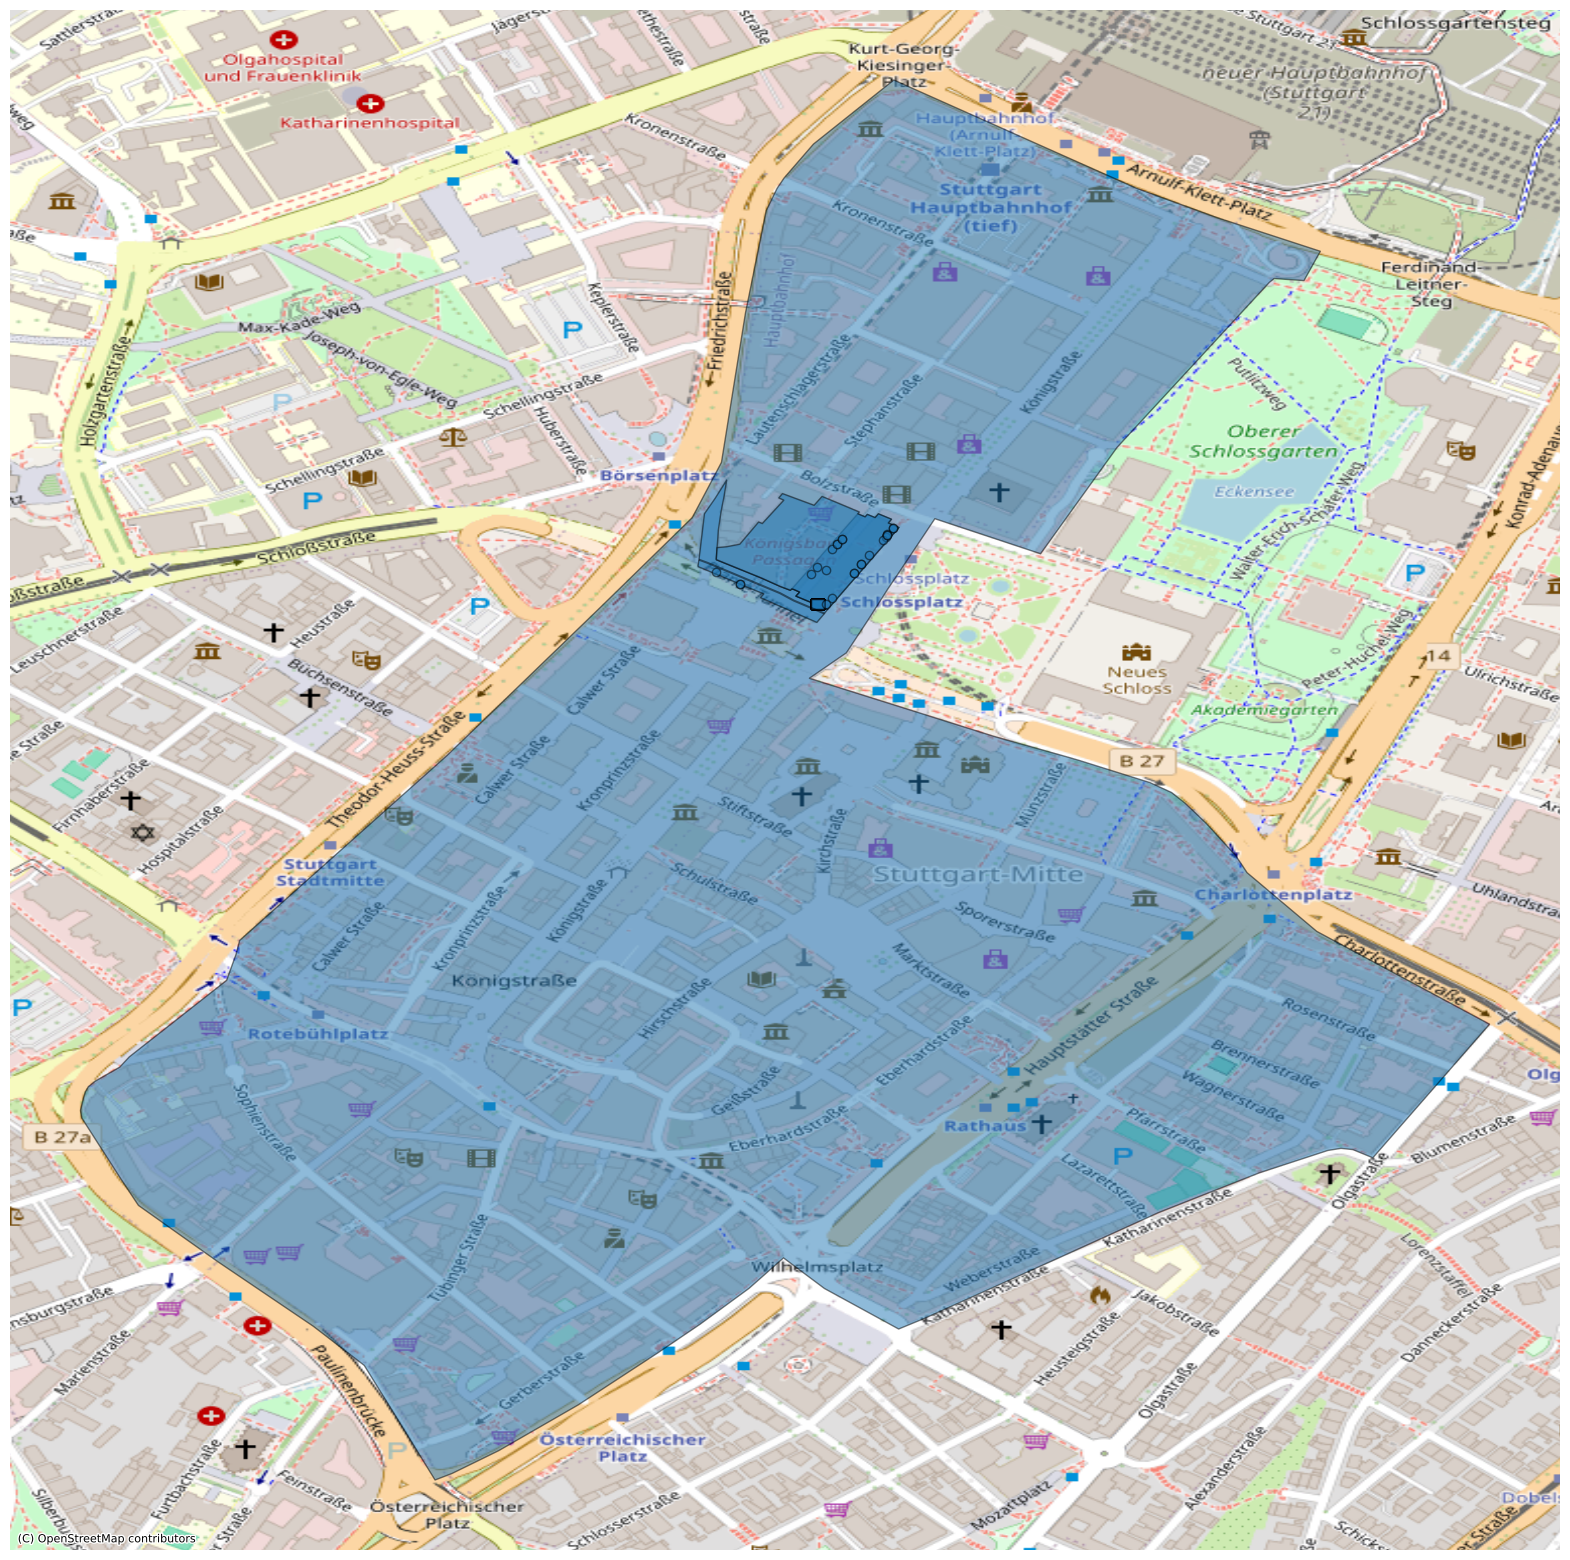

In [18]:
# Reproject to Web Mercator
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(20,20))  # Wide rectangle

# Plot with basemap
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ax.set_aspect('auto')  # Disable equal aspect ratio

# basemap sources: OpenStreetMap.Mapnik CartoDB.Positron CartoDB.DarkMatter Esri.WorldImagery
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

ax.axis(False)

plt.show()

code to visualize contacts with polygons:
```
with t2osm as (
	select t2o.tile_id, tile, unnest(osm_ids) as osm_id
		, st_transform(st_translate(st_setsrid(tile6togeo(t2o.tile), 32632), tx.minx, tx.miny), 3857) as geopoint_t2o
		, st_transform(st_translate(st_setsrid(tile8togeo(610751313220), 32632), tx.minx, tx.miny), 3857) as geopoint_c
	from tuberlin_euro2024_tile2osmid as t2o
	join txc_dt_grid_1000m as tx on t2o.tile_id = tx.tile_id
	where tile = 6107513132
)
select osm.way, tile82polygon(t2osm.geopoint_c), t2osm.*
from t2osm
join tuberlin_euro2024_osm as osm on osm.osm_id = t2osm.osm_id and osm.tile_id = t2osm.tile_id
where osm.leisure='stadium'--osm.barrier='wall'--osm.amenity='parking'--osm.route='light_rail'
```

code to visualize contacts with points:
```
with t2osm as (
	select t2o.tile_id, tile, unnest(osm_ids) as osm_id
		, st_transform(st_translate(st_setsrid(tile6togeo(t2o.tile), 32632), tx.minx, tx.miny), 3857) as geopoint_t2o
		, st_transform(st_translate(st_setsrid(tile8togeo(601852203230), 32632), tx.minx, tx.miny), 3857) as geopoint_c
	from tuberlin_euro2024_tile2osmid as t2o
	join txc_dt_grid_1000m as tx on t2o.tile_id = tx.tile_id
	where tile = 601852203230
)
select poi.way_point, tile82polygon(t2osm.geopoint_c), poi.way_polygon, t2osm.*
from t2osm
join euro2024_poi_all_smallestpolygon as poi on poi.osm_id_polygon = t2osm.osm_id
--where poi.amenity='fast_food'
```